In [1]:
#importing some essential libraries for EDA
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("teleco_cust_churn.csv") #importing dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce') #coverting to a numeric datatype

In [7]:
df.isnull().sum() #now finding the various null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()
# drop the null variables

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#importing the data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

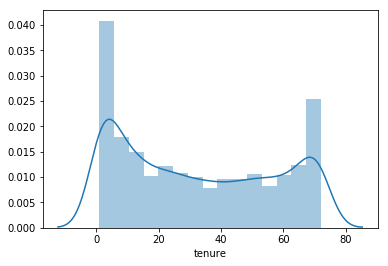

In [11]:
 sns.distplot(df['tenure'])

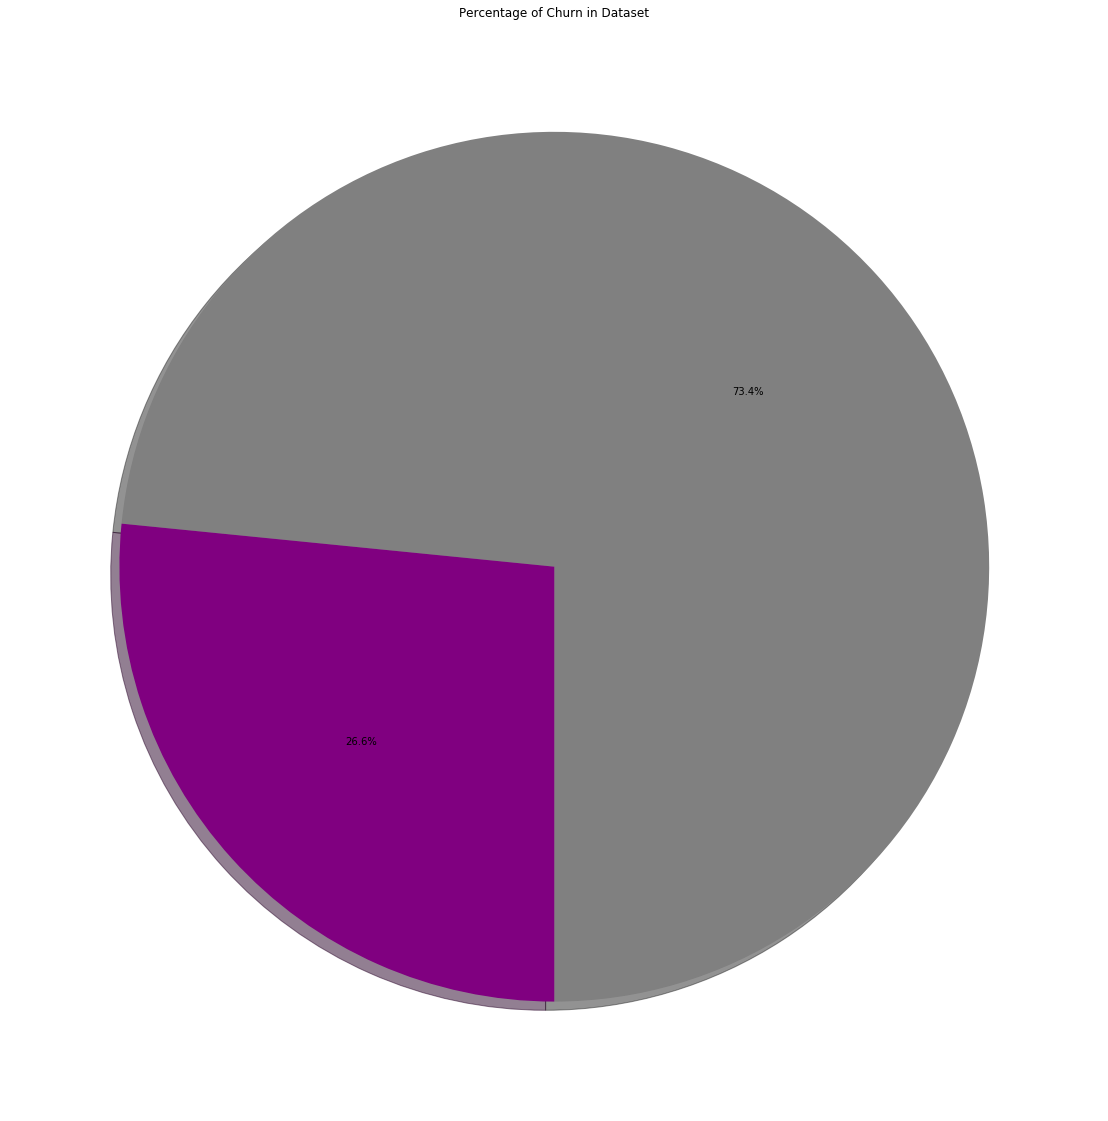

In [12]:
# Data to plot percentage of churns in data set
sizes = df['Churn'].value_counts(sort = True)
colors = ["grey","purple"] #grey is for no and purble is for yes
rcParams['figure.figsize'] = 20,20# Plot
plt.pie(sizes,colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()
#this shows that 73.4% of the customers are not churning out whereas only 26.6% are churning

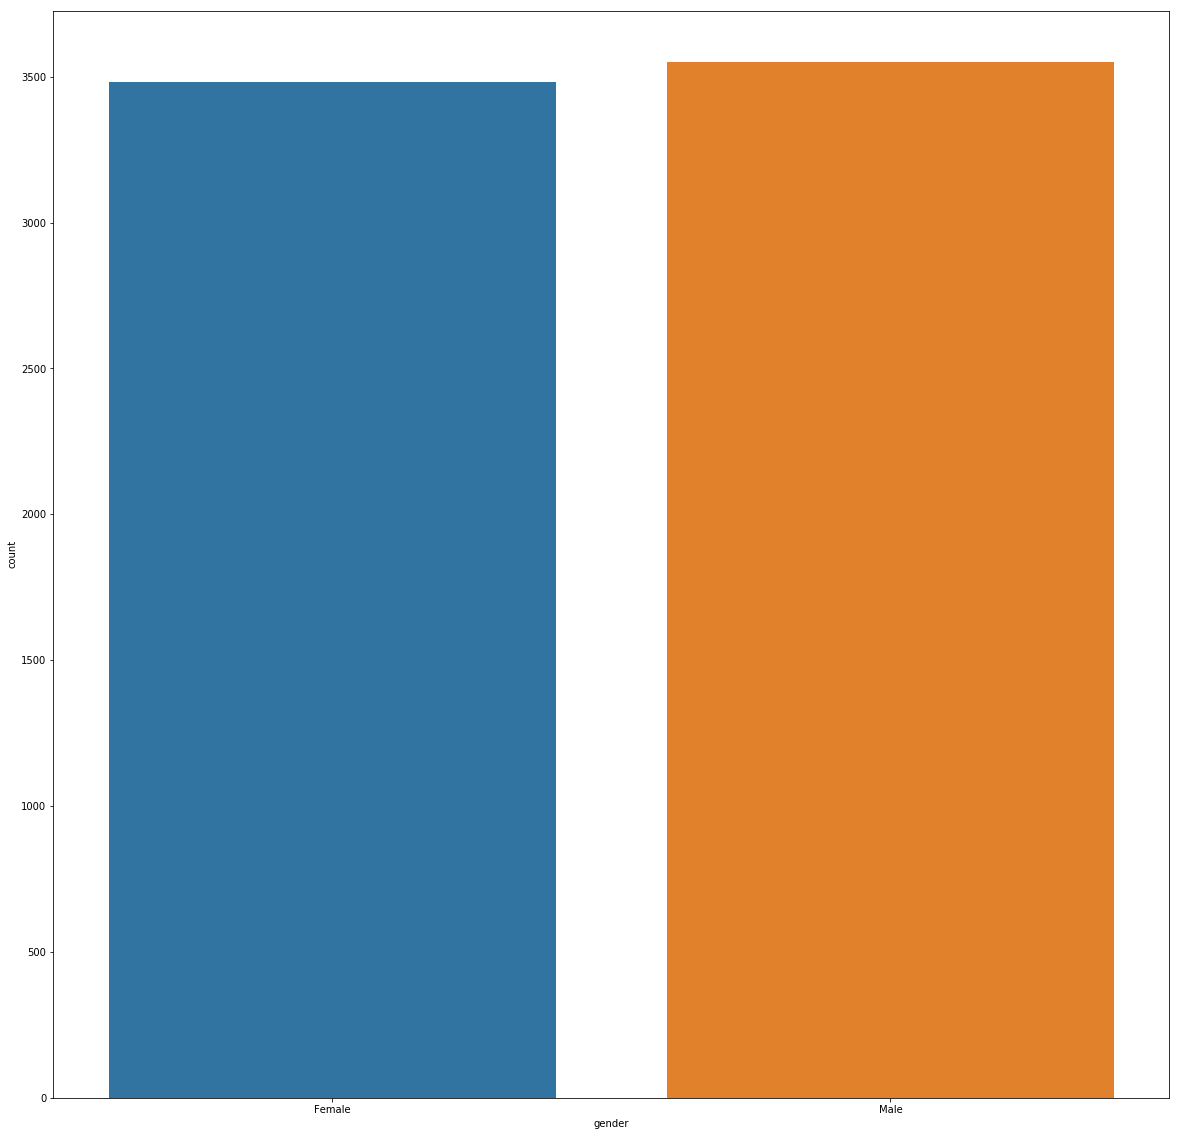

In [13]:

sns.countplot(x = "gender", data = df)
#with this we understand that the male users are a little higher than that of the female users

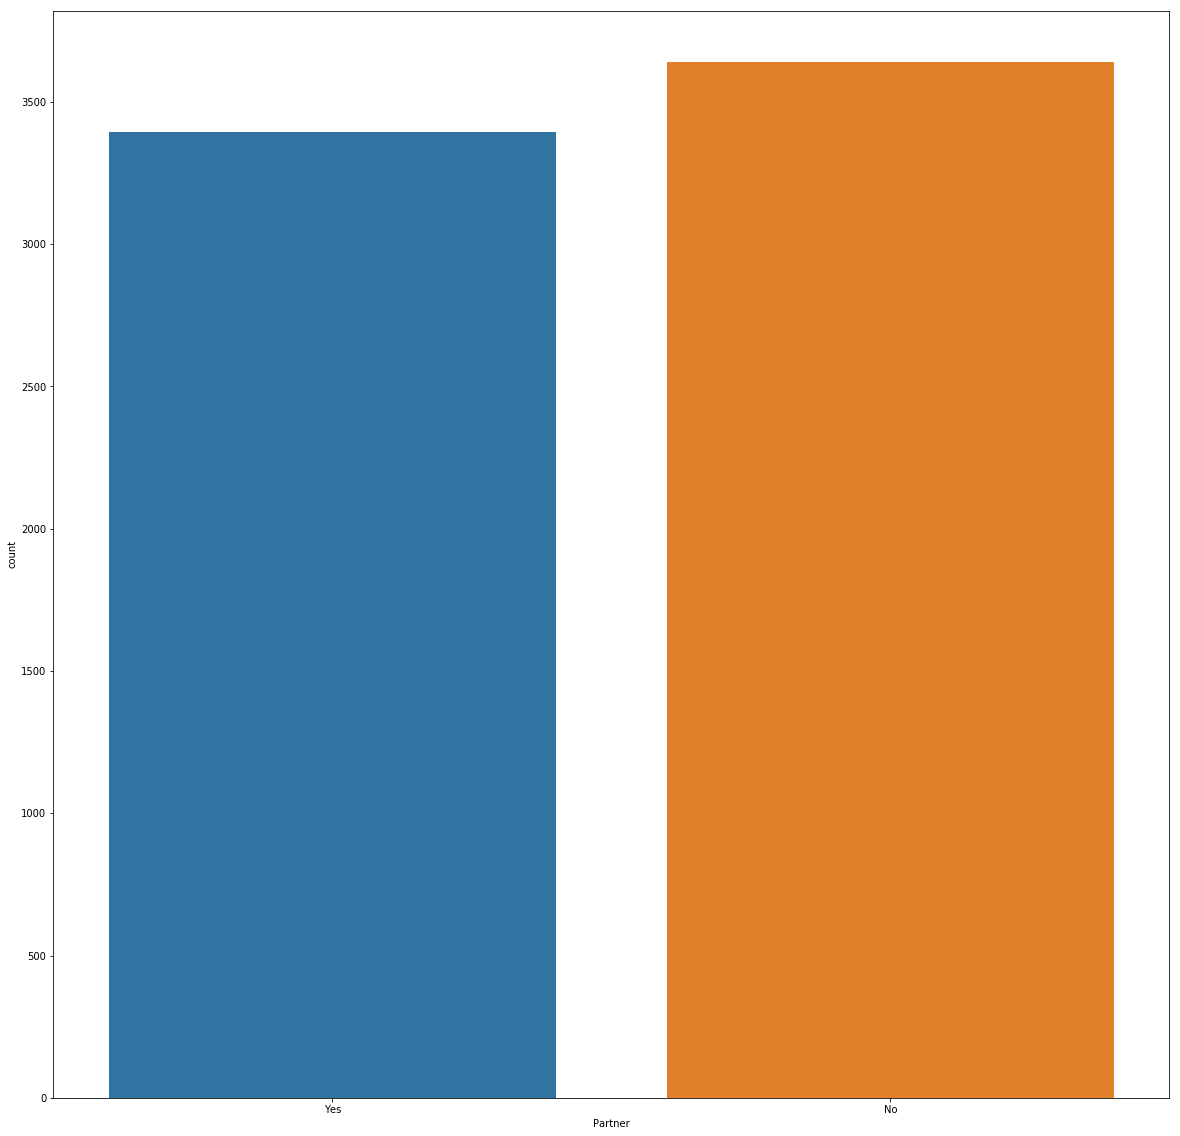

In [14]:
sns.countplot(x = "Partner", data = df)

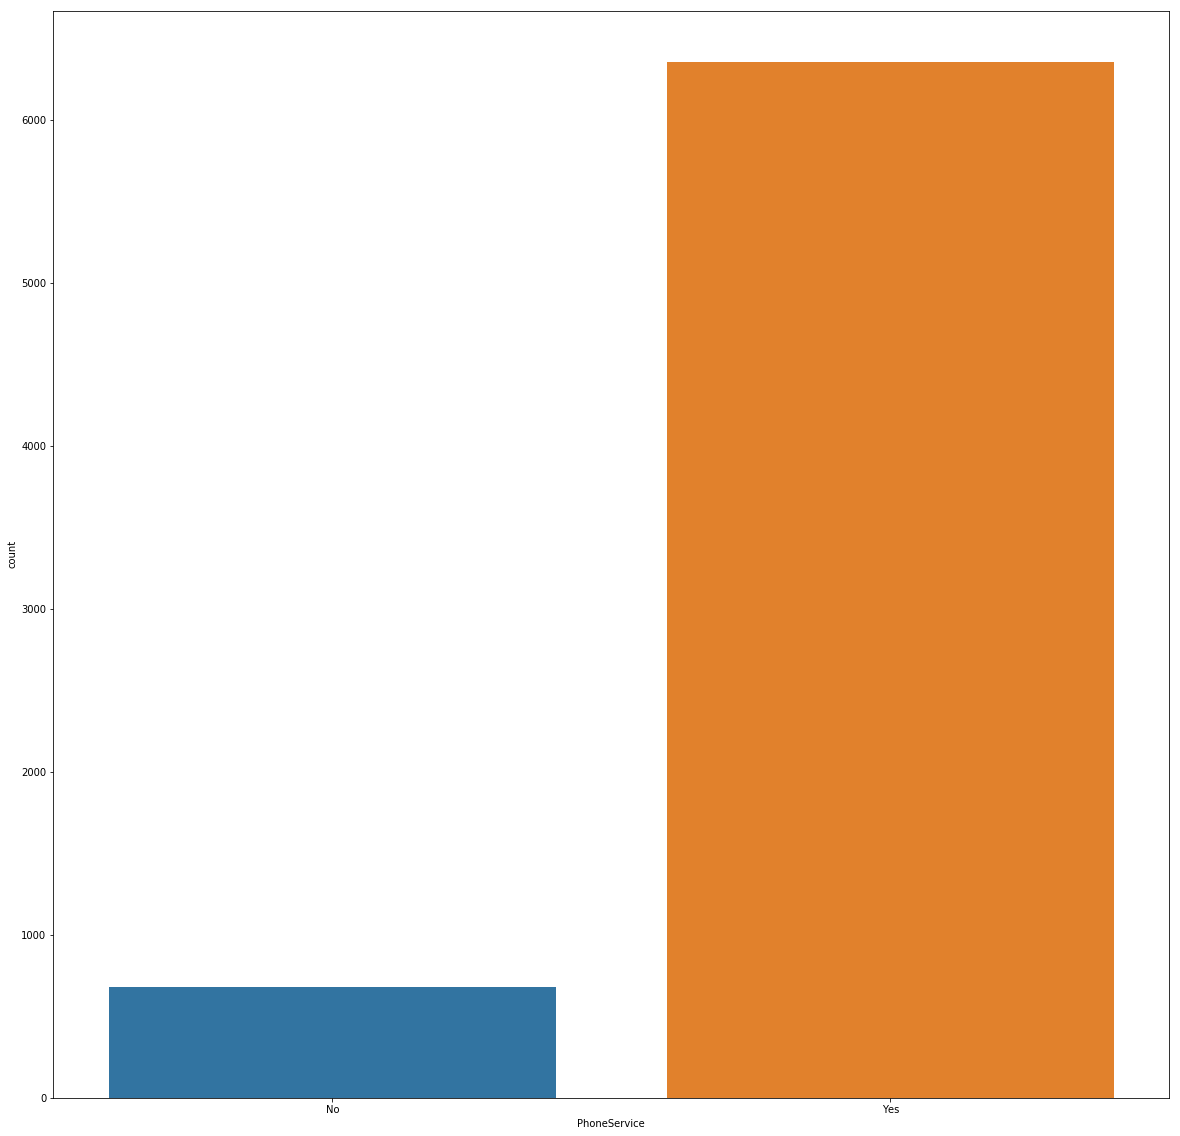

In [15]:
sns.countplot(x = "PhoneService", data = df)

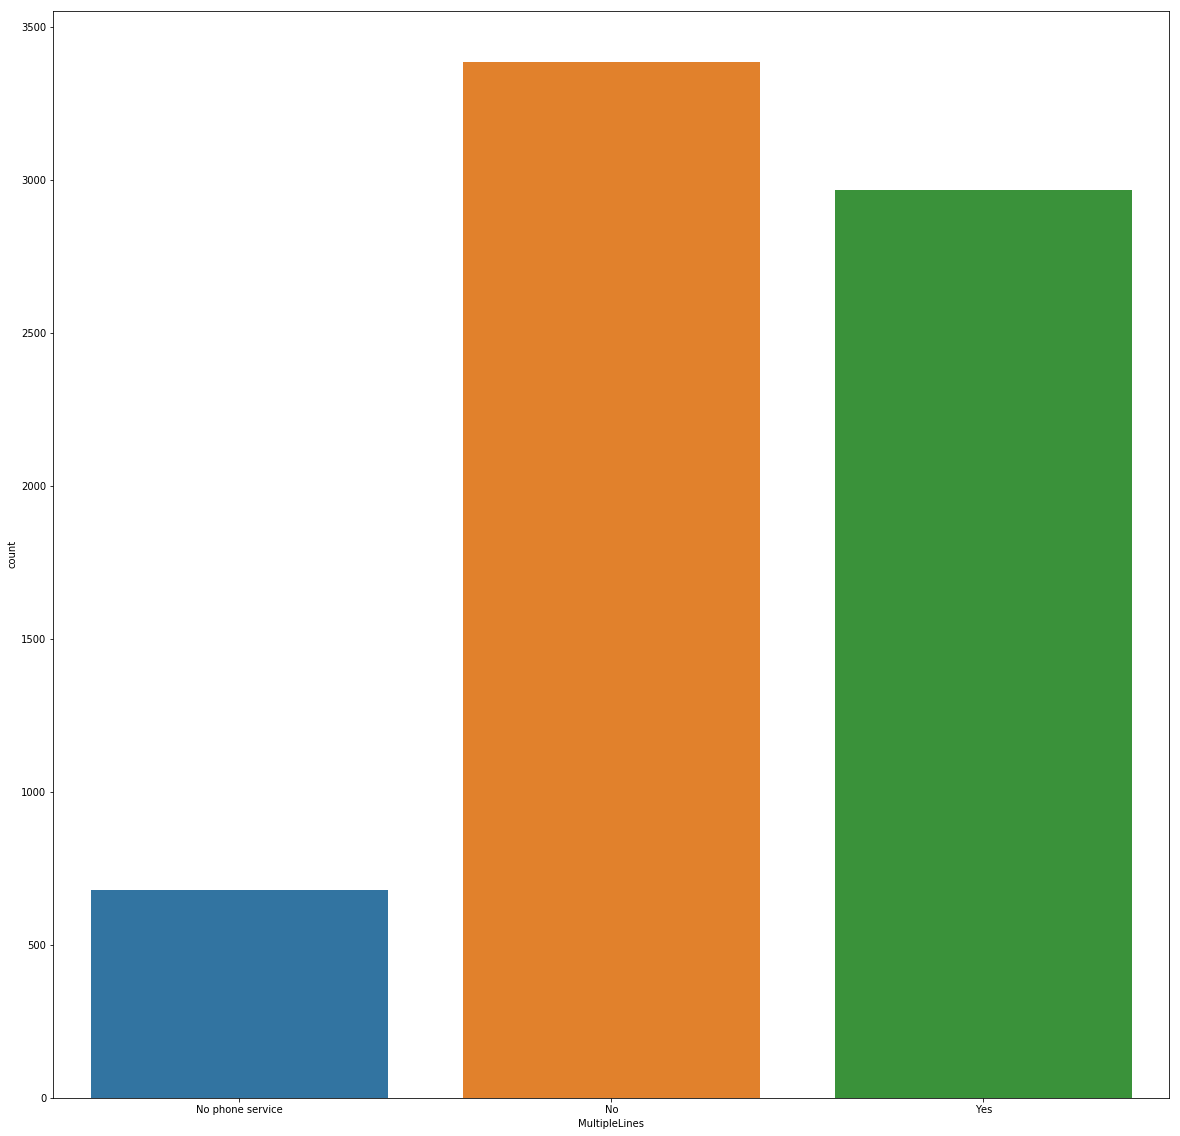

In [16]:
 sns.countplot(x = "MultipleLines", data = df)

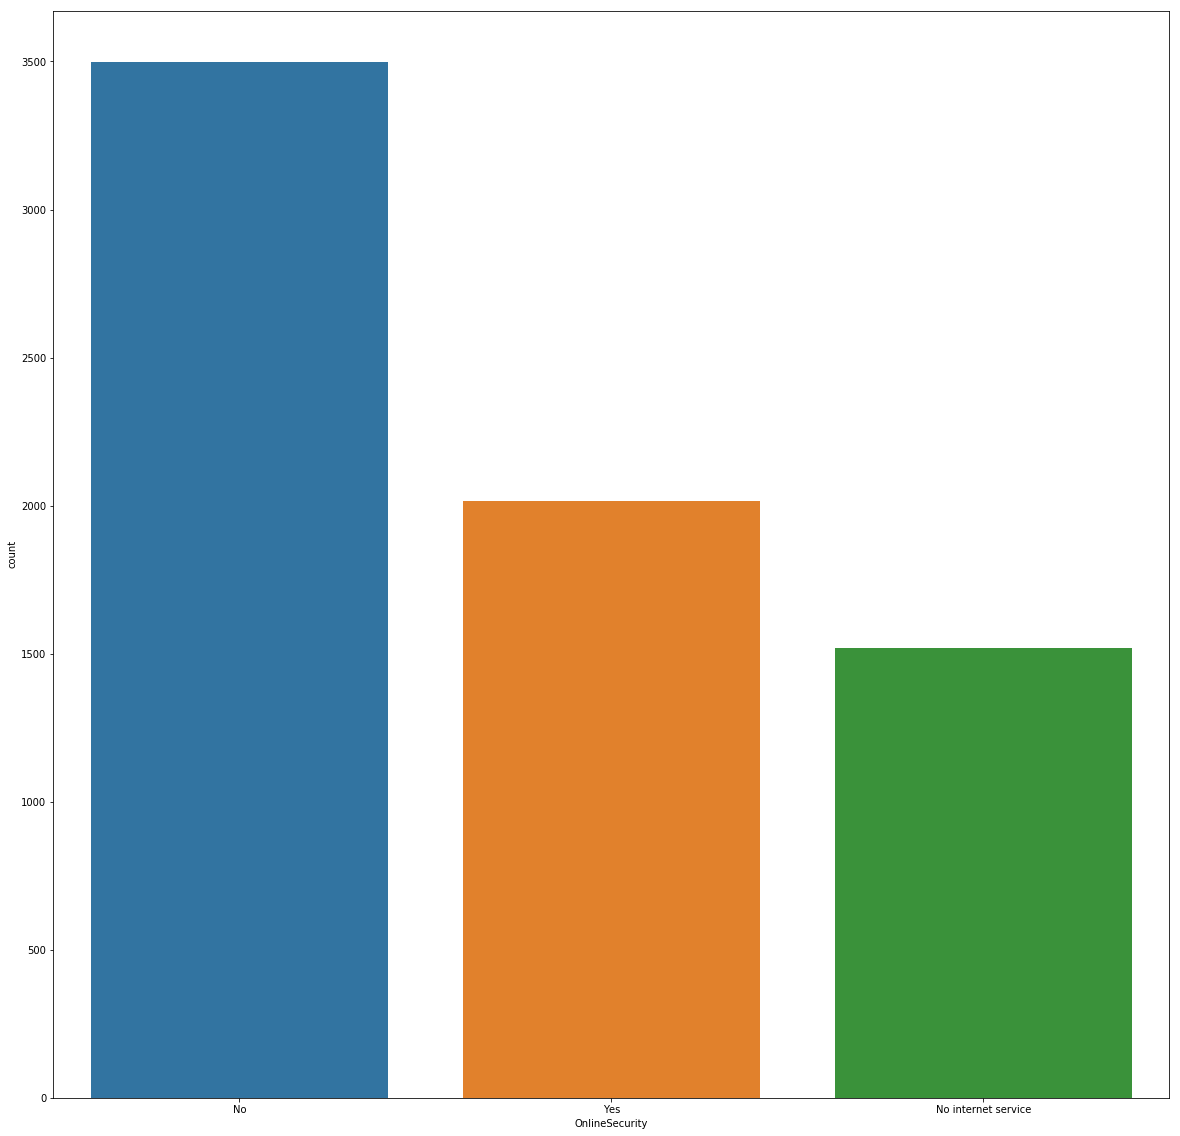

In [17]:
sns.countplot(x = "OnlineSecurity", data = df)

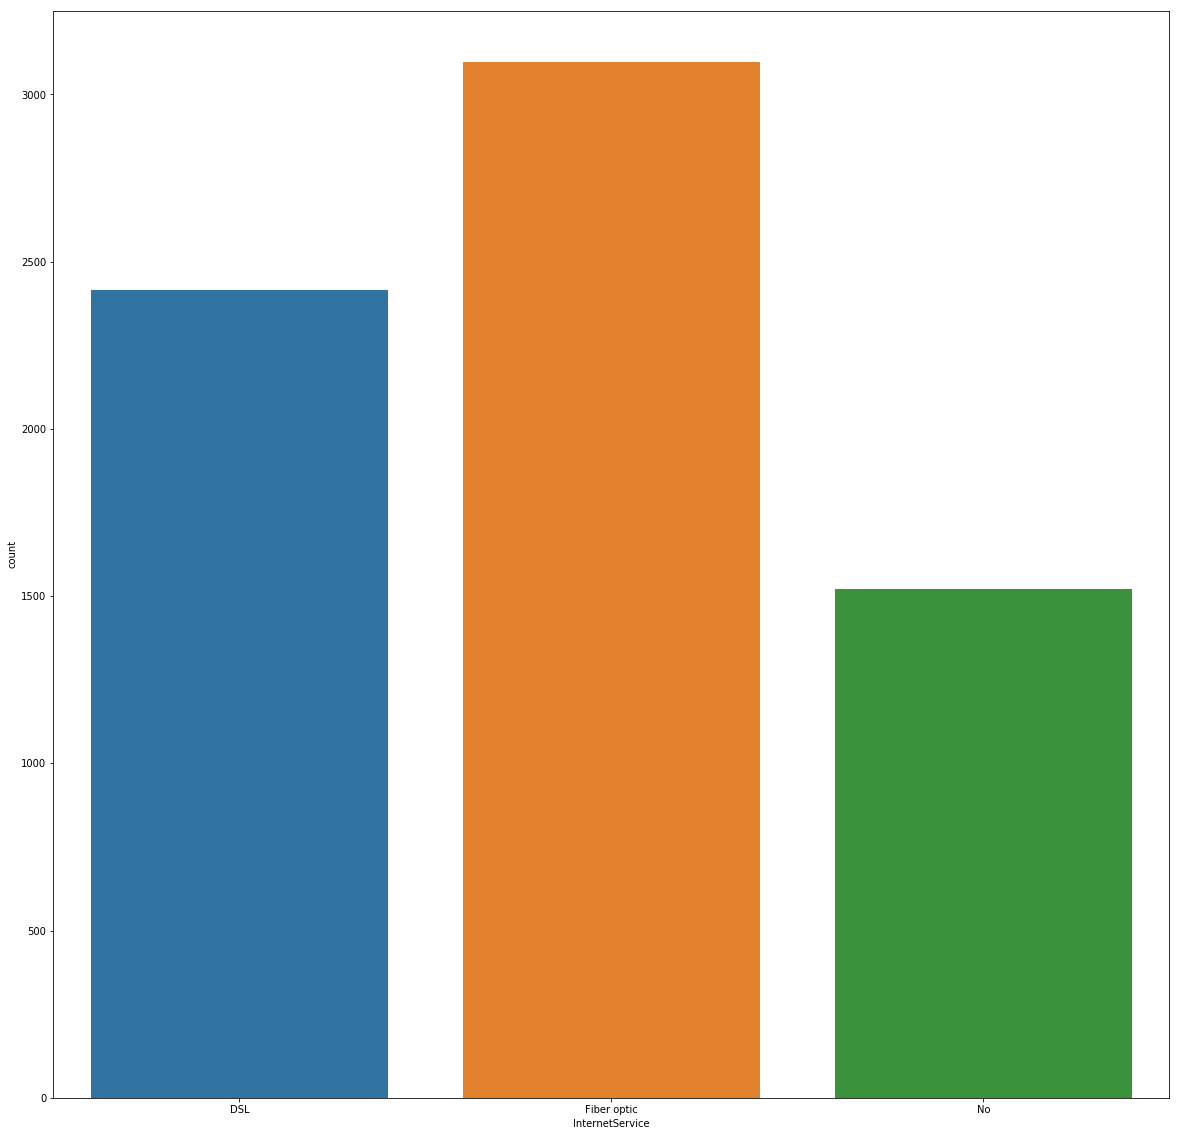

In [18]:
sns.countplot(x = "InternetService", data = df)

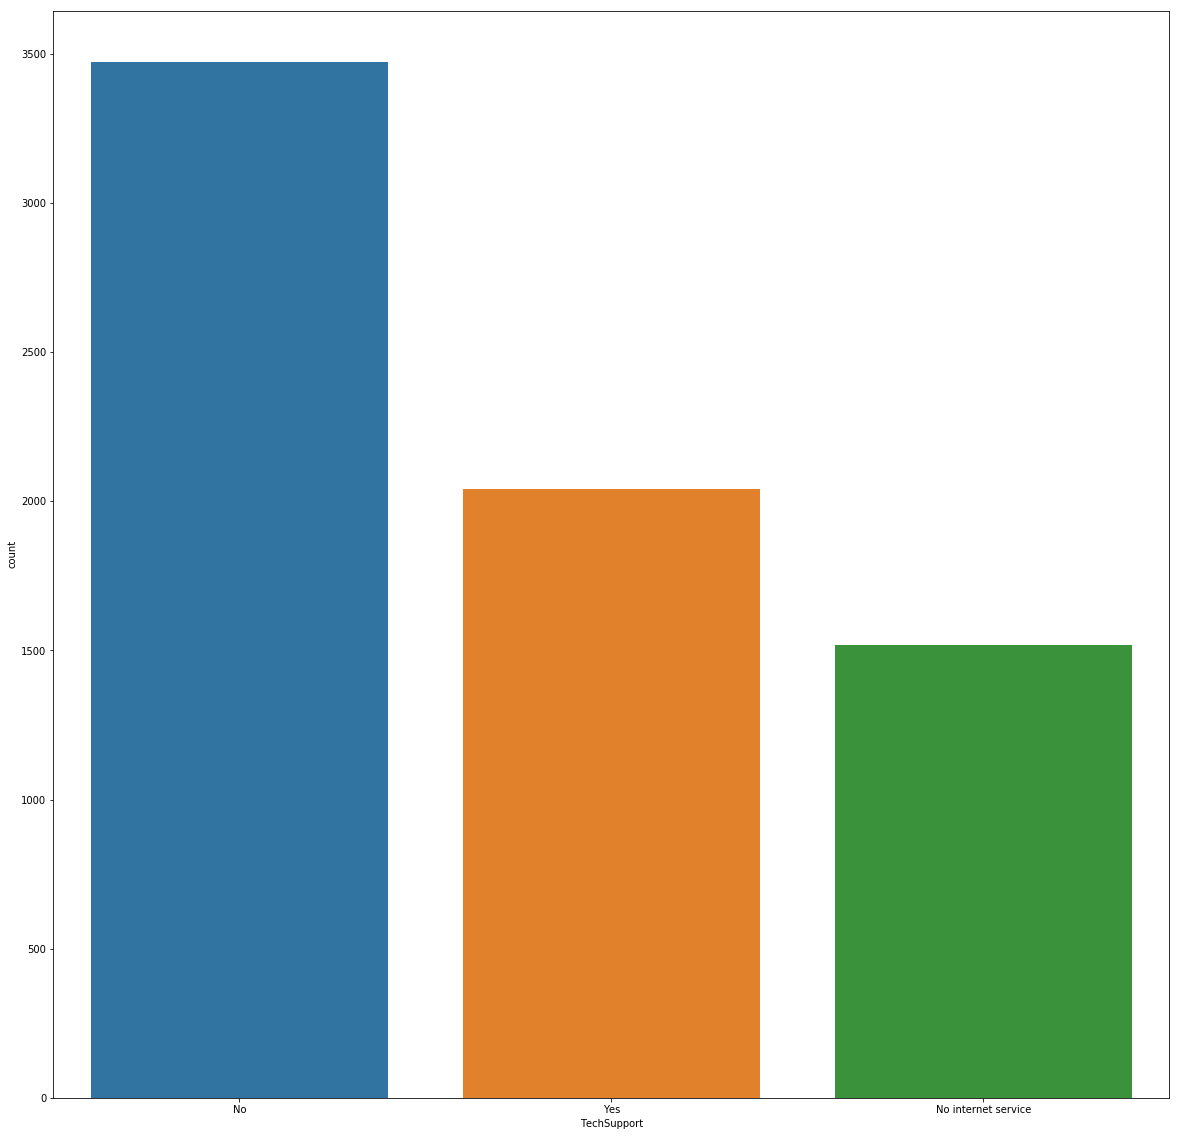

In [19]:
sns.countplot(x = "TechSupport", data = df)

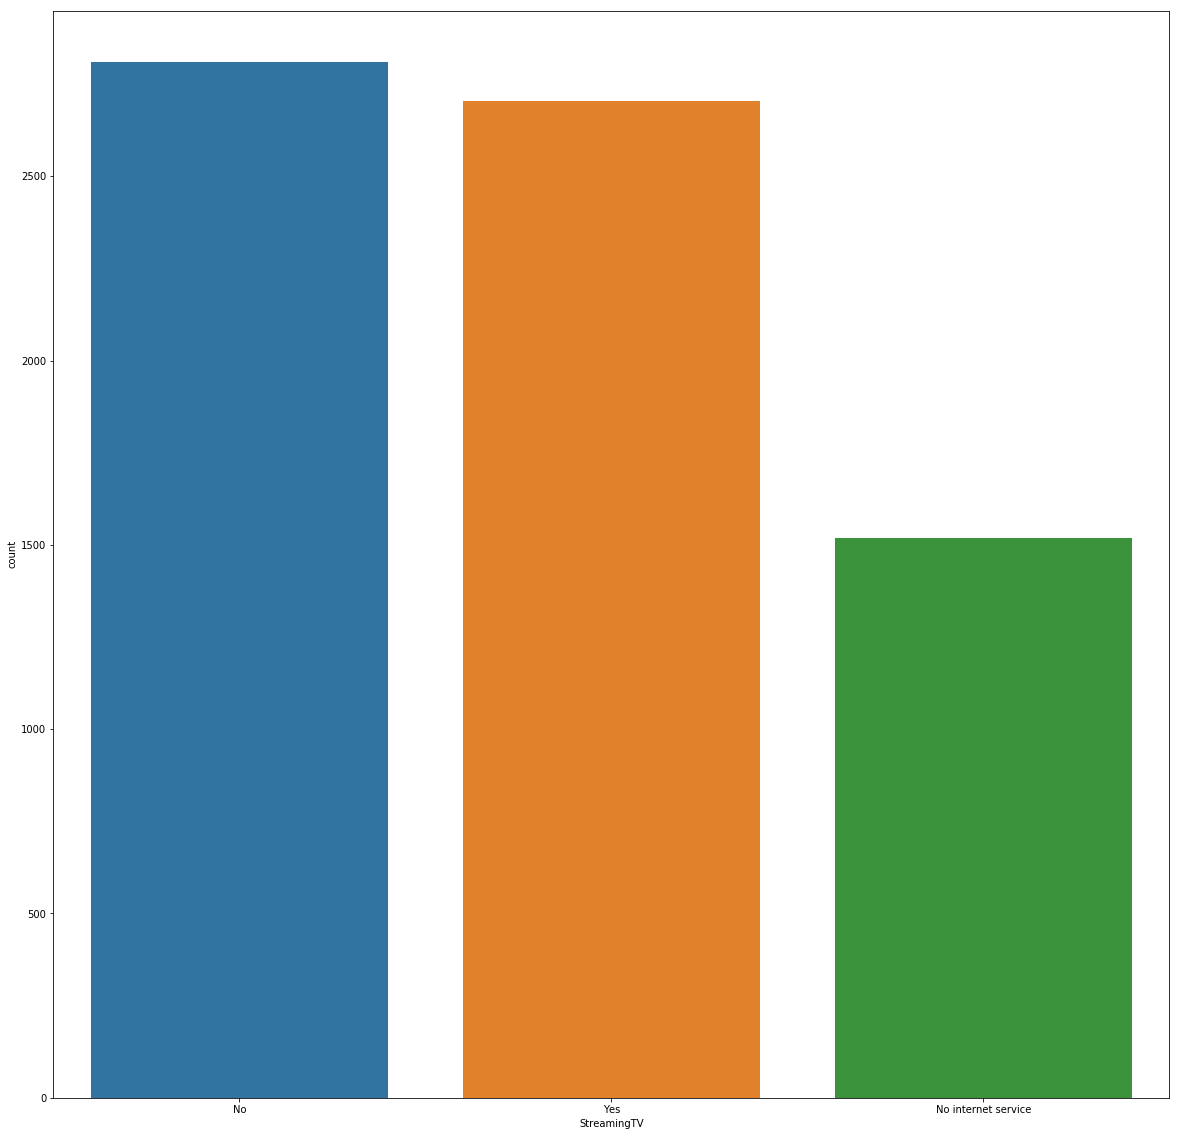

In [20]:
sns.countplot(x = "StreamingTV", data = df)

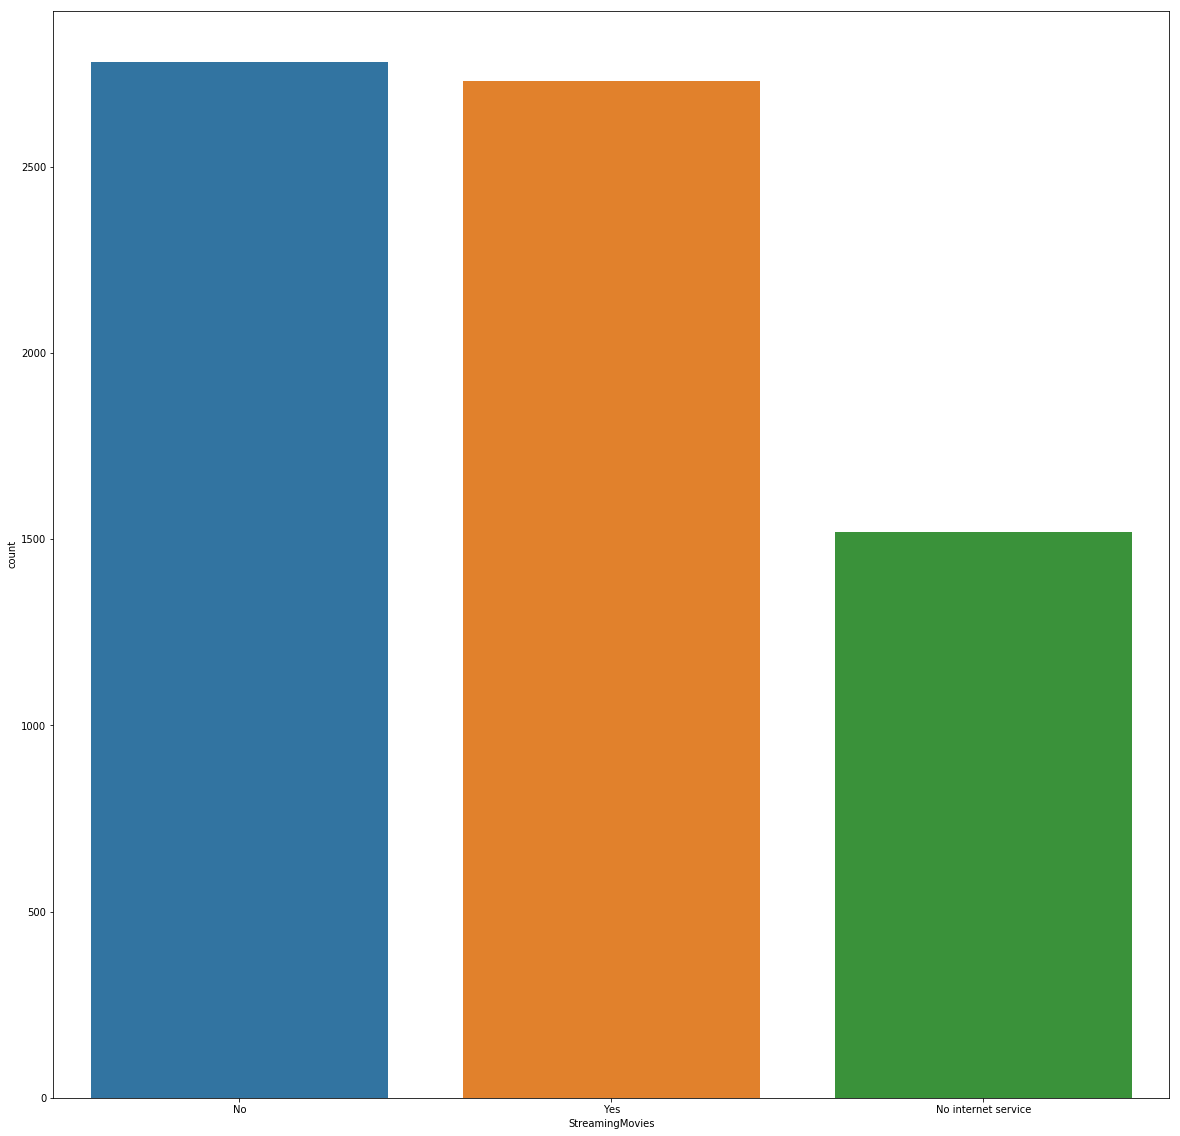

In [21]:
sns.countplot(x = "StreamingMovies", data = df)

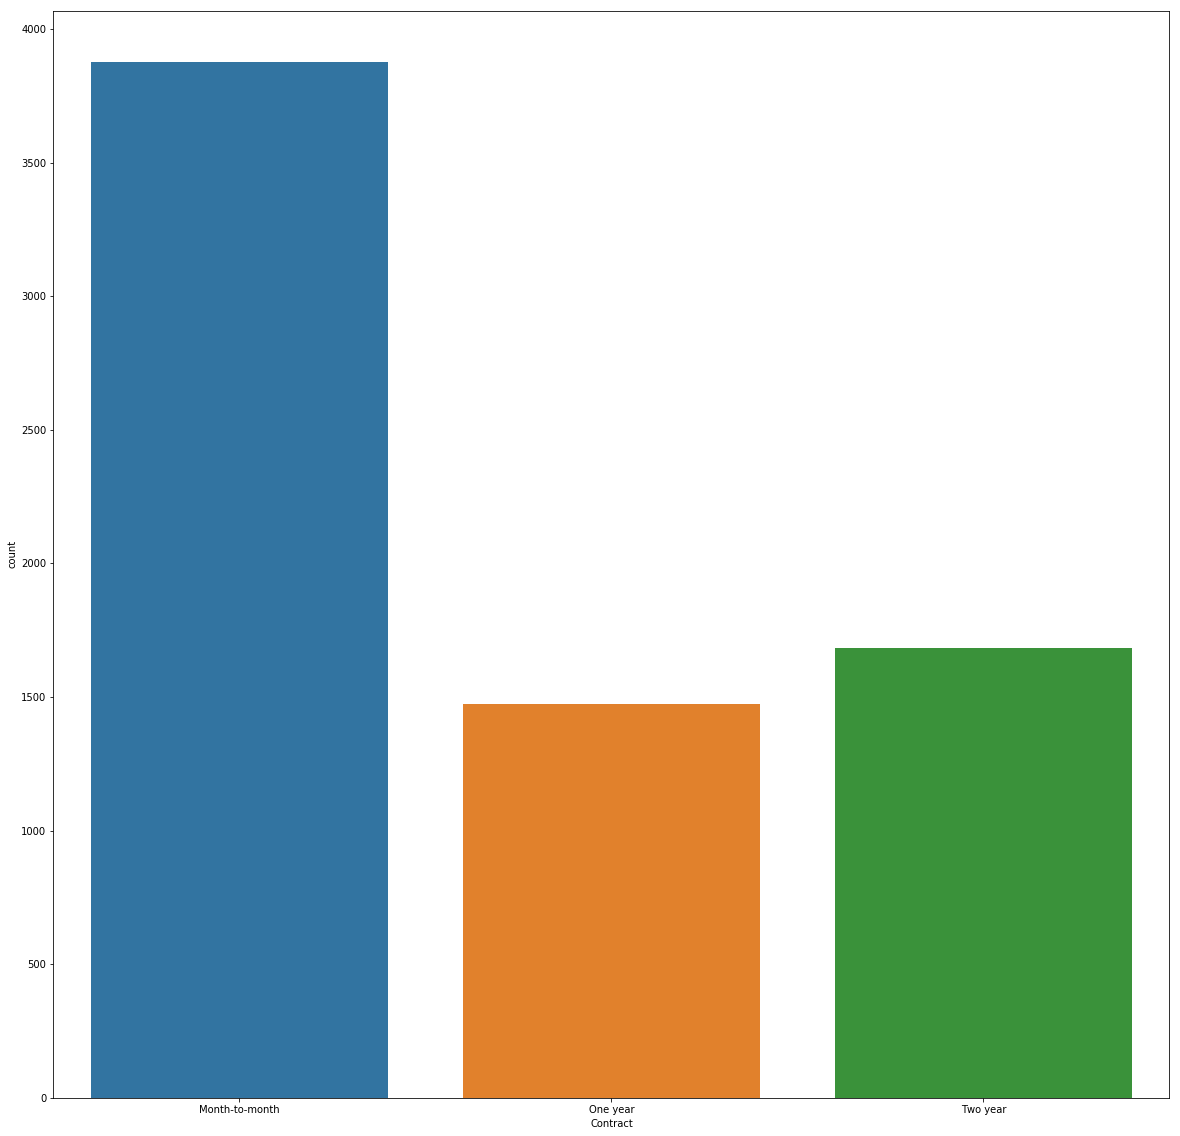

In [22]:
sns.countplot(x = "Contract", data = df)

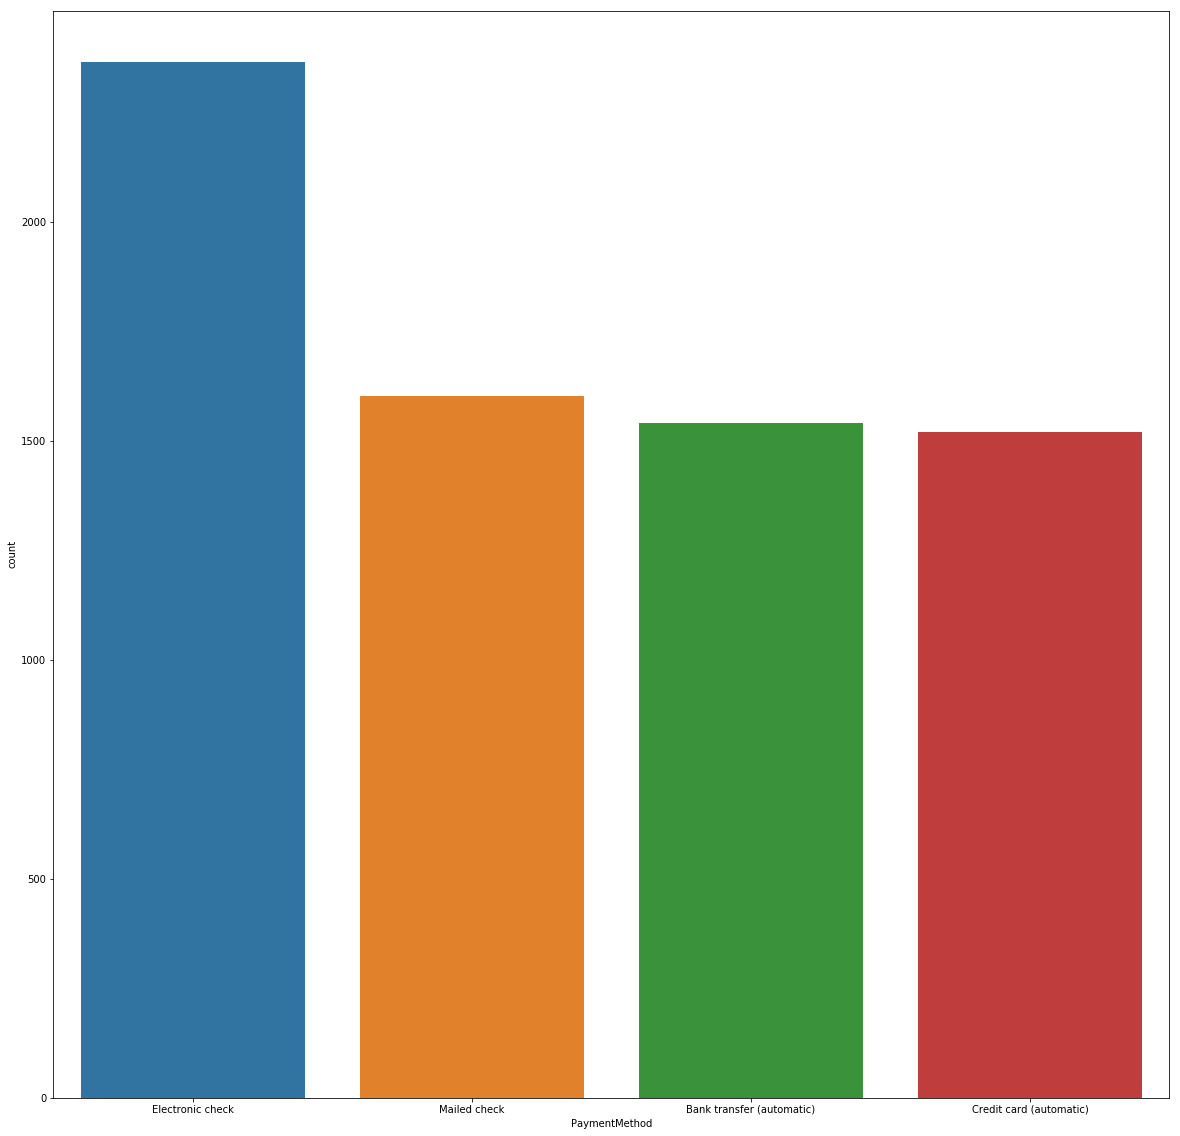

In [23]:
sns.countplot(x = "PaymentMethod", data = df)

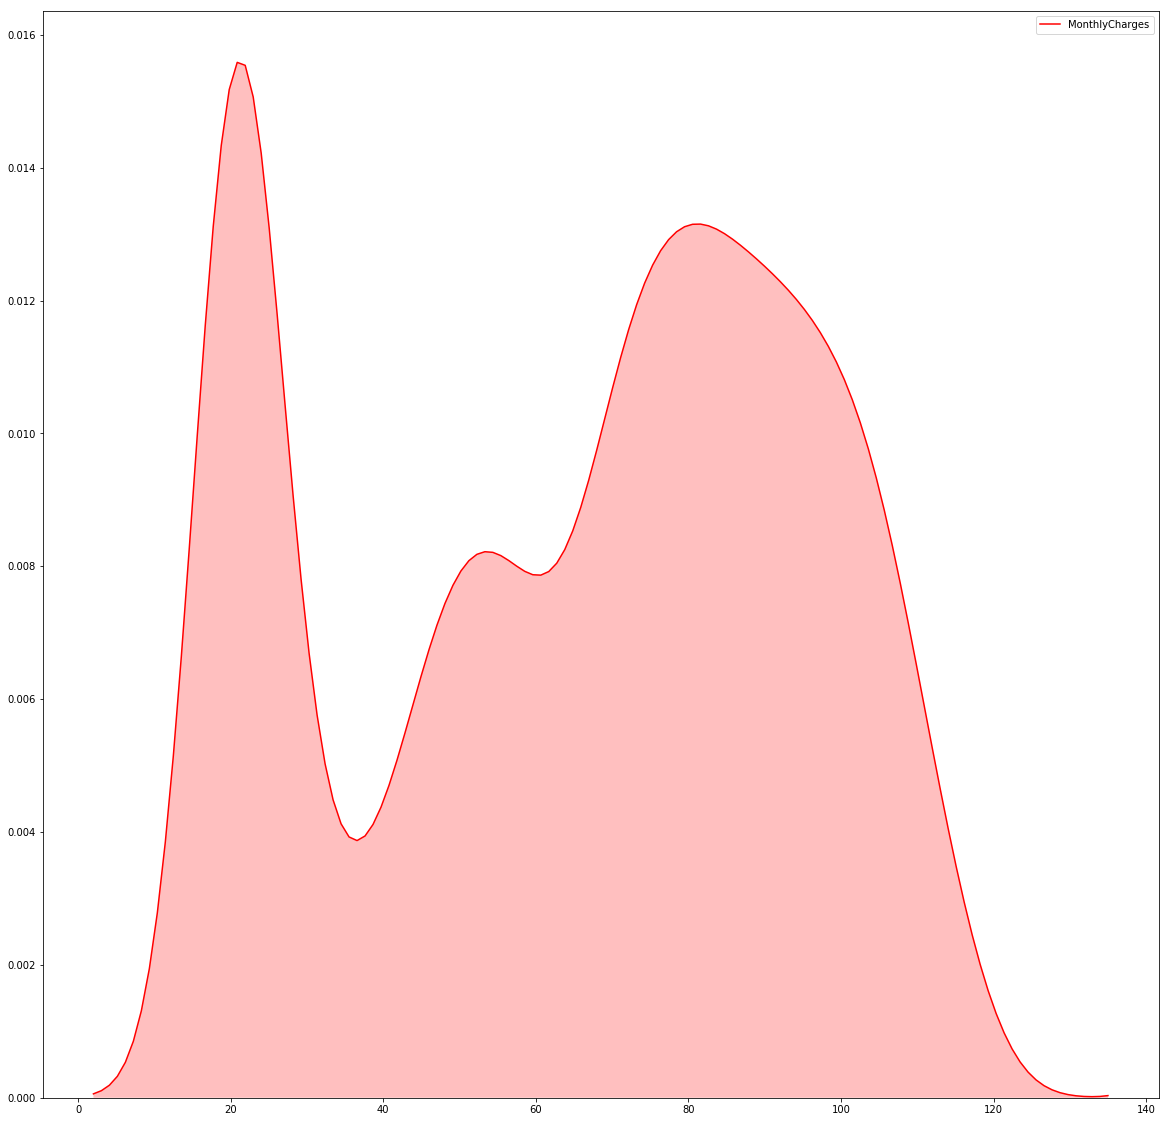

In [24]:
sns.kdeplot(df["MonthlyCharges"], shade=True, color="r")

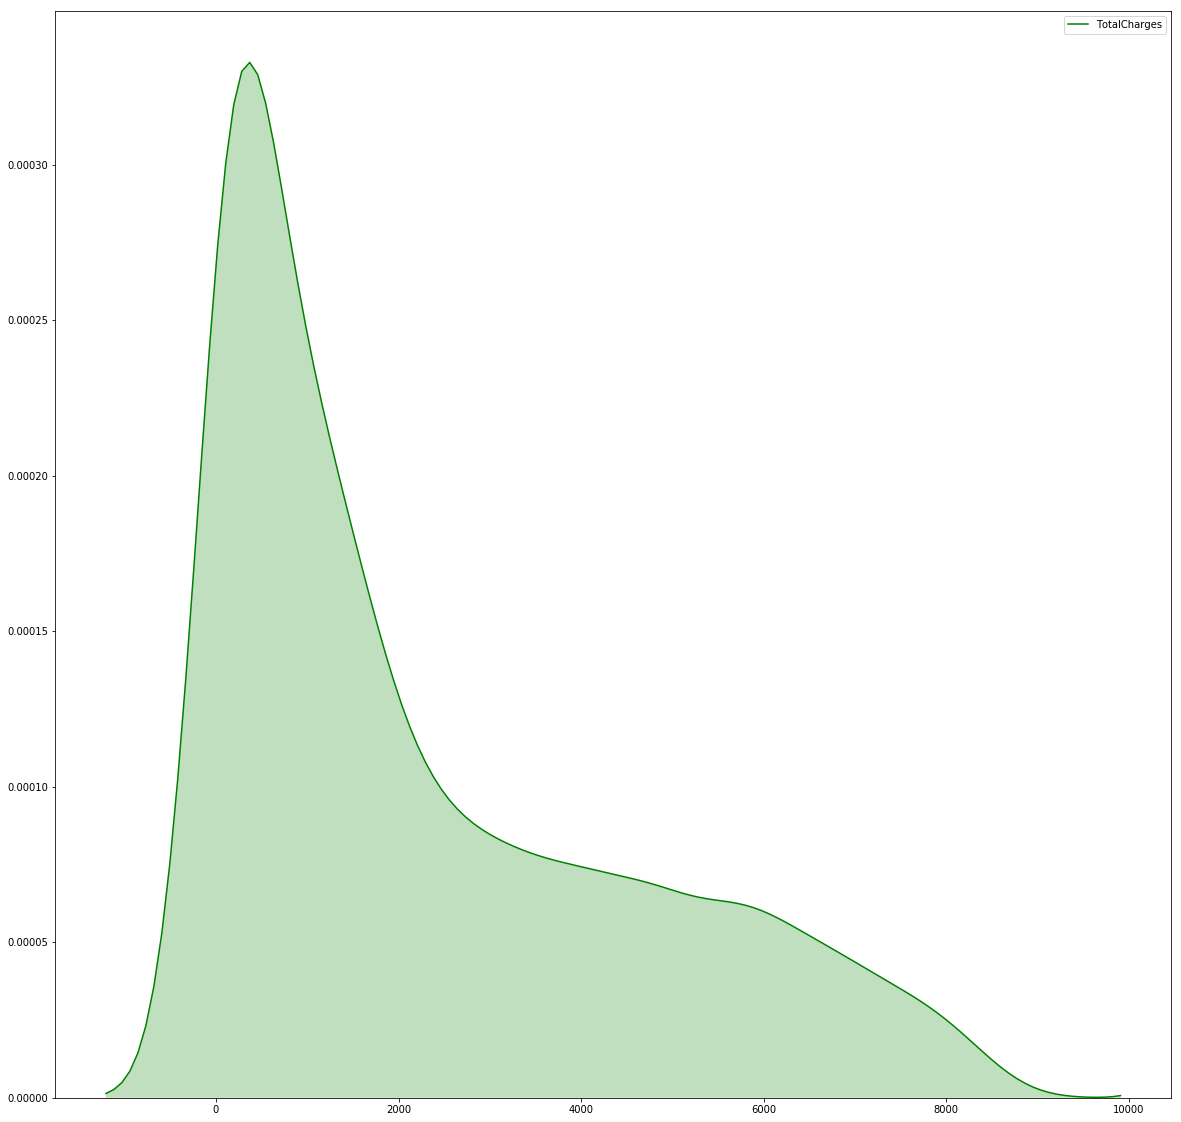

In [25]:
sns.kdeplot(df["TotalCharges"], shade=True, color="g")

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
data=df.copy()

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
for i in data.columns[:-1]:
    data[i]=le.fit_transform(data[i])

In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,No
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,No
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,Yes
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,No
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,Yes


In [34]:
for i in data.columns:
    print(data[i].value_counts())

1    3549
0    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
0    3639
1    3393
Name: Partner, dtype: int64
0    4933
1    2099
Name: Dependents, dtype: int64
0     613
71    362
1     238
2     200
3     176
70    170
4     133
6     131
7     123
69    119
8     119
11    117
9     116
5     110
12    109
67    100
10     99
14     99
66     98
17     97
68     95
23     94
21     90
65     89
34     88
16     87
22     85
63     80
55     80
51     80
     ... 
26     72
19     71
52     70
40     70
61     70
31     69
53     68
50     68
46     68
49     68
57     67
48     66
41     65
30     65
42     65
56     65
33     65
36     65
39     64
47     64
32     64
54     64
20     63
44     61
58     60
37     59
27     57
38     56
43     51
35     50
Name: tenure, Length: 72, dtype: int64
1    6352
0     680
Name: PhoneService, dtype: int64
0    3385
2    2967
1     680
Name: MultipleLines, dtype: int64
1    3096
0    2416
2    1520
Name

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null int64
TotalCharges        7032 non-null int64
Churn               7032 non-null object
dtypes: int64(19), object(1)
memory usage: 1.1+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series


In [37]:
data= data.apply(lambda x: object_to_int(x))
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null int64
TotalCharges        7032 non-null int64
Churn               7032 non-null int64
dtypes: int64(20)
memory usage: 1.1 MB


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
Y = data["Churn"].values

In [41]:
X = data.drop(labels = ["Churn"],axis = 1)

In [42]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 19) (5625,)
(1407, 19) (1407,)


In [44]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
#importing the logistic regression model

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predicted_churn=model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test,predicted_churn)

In [49]:
accuracy

0.8109452736318408

In [55]:
#creating a function that accepts the name of a column (feature) as it's argument and groups 
#the dataframe on that feature giving us the total amount of churned users with respect
#to each value in that feature
def categorical_segment(column_name:str) -> 'grouped_dataframe':
    segmented_df = df[[column_name, 'Churn']]
    segmented_churn_df = segmented_df[segmented_df['Churn'] == 'Yes']
    grouped_df = segmented_churn_df.groupby(column_name).count().reset_index().rename(columns = {'Churn':'Churned'})
    total_count_df = segmented_df.groupby(column_name).count().reset_index().rename(columns = {'Churn':'Total'})
    merged_df = pd.merge(grouped_df, total_count_df, how = 'inner', on = column_name)
    merged_df['Percent_Churned'] = merged_df[['Churned','Total']].apply(lambda x: (x[0] / x[1]) * 100, axis=1) 
    return merged_df


In [56]:
categorical_columns_list = list(df.columns)[1:5] + list(df.columns)[6:18]

grouped_df_list = []

for column in categorical_columns_list:
    grouped_df_list.append( categorical_segment( column ) )
    
grouped_df_list[0]

,SeniorCitizen,Churned,Total,Percent_Churned
0,0,1393,5890,23.650255
1,1,476,1142,41.681261
